# Fashion MNIST Practice Challenge


Authors
*   Omer Faruk Gokbak AI41: 3782174
*   Onur Ereren AI45: 344173



In this notebook, we will analyse the Fashion-MNIST dataset by trying different models and approaches. We will choose a final(best fitting) model. The notebook will be concluded with a result. We need to predict a category and data is labelled. Therefore, classification models seem to fit in this case. First is first, we need to import some libraries to start with.

## Import Libraries

In [1]:
#import seaborn
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
from prettytable import PrettyTable
from sklearn import model_selection
from sklearn import linear_model, ensemble, tree, neighbors, svm
import numpy as np
import matplotlib
import random
import matplotlib.pyplot as plt
import time
from sklearn import metrics



### Label   Description
The datasets have a label for each cloth described here in ascending order:
- 0         T-shirt/top
- 1         Trouser
- 2         Pullover
- 3         Dress
- 4         Coat
- 5         Sandal
- 6         Shirt
- 7         Sneaker
- 8         Bag
- 9         Ankle boot

Train and test datasets consist of 60.000 and 10.000 images respectively. Each image has 784 features. Features are represented pixels. An image consists of 28x28 pixels, associated with a label from 10 classes and each pixel is a value from 0 to 255 describing the pixel intensity. 0 for white and 255 for black.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In order to work with the same data on google collab we used a shared drive in order to store dataset

Let's load the test and training data using pandas. The data is taken from https://github.com/zalandoresearch/fashion-mnist which is already separated into training and test datasets.

In [3]:
data_test = pd.read_csv("/content/drive/MyDrive/MNIST/fashion-mnist_test.csv")
data_train = pd.read_csv("/content/drive/MyDrive/MNIST/fashion-mnist_train.csv")


Lets just have a quick look onto datasets

In [21]:
data_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


We can see that our labels embedded with the pixels, therefore, we have to seperate them in order to split them into test and train.

In [4]:
X_train = data_train.drop(['label'],axis=1)
X_test = data_test.drop(['label'], axis=1)
y_train = data_train.label
y_test = data_test.label

Let's check our datasets shape

In [6]:
print("Shape of X_train: {}".format(X_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print()
print("Shape of X_test: {}".format(X_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 784)
Shape of y_train: (60000,)

Shape of X_test: (10000, 784)
Shape of y_test: (10000,)


We can see the shape of our train and test datasets

Let's look an image closer from train dataset. As we mentioned above each image has 784 features and we need to reshape it to 28 x 28 array in order to display as a image. Then, we need to call imshow() function of Matplotlib. It displays the data by 28x28 pixels image. 

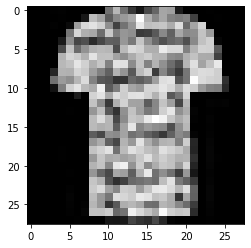

In [7]:
def displayImage(data):
  image = data
  image = image.values.reshape(28,28)
  plt.imshow(image,cmap='gray')
  plt.show()

displayImage(X_train.iloc[3])


It seems like a t-shirt/top Lets check it by calling our label dataset

In [8]:
y_train[3]

0

0 is indeed Tshirt so It matched

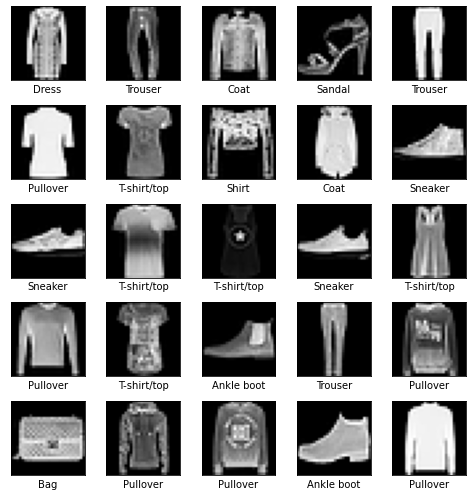

In [5]:
Labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
n_rows = 5
n_columns = 5
plt.figure(figsize=(7, 7)) 
for i in range(n_rows * n_columns):
    index = random.randint(0, len(X_train)+1)
    img = X_train.iloc[index]
    img = img.values.reshape(28,28)
    plt.subplot(n_rows, n_columns, i+1)       
    plt.imshow(img,cmap='gray')  
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(Labels[y_train[index]])
    plt.tight_layout()   
    
plt.show()

We can also plot random images with their labels to get an overview of the data.

## Choosing ML Algorithm

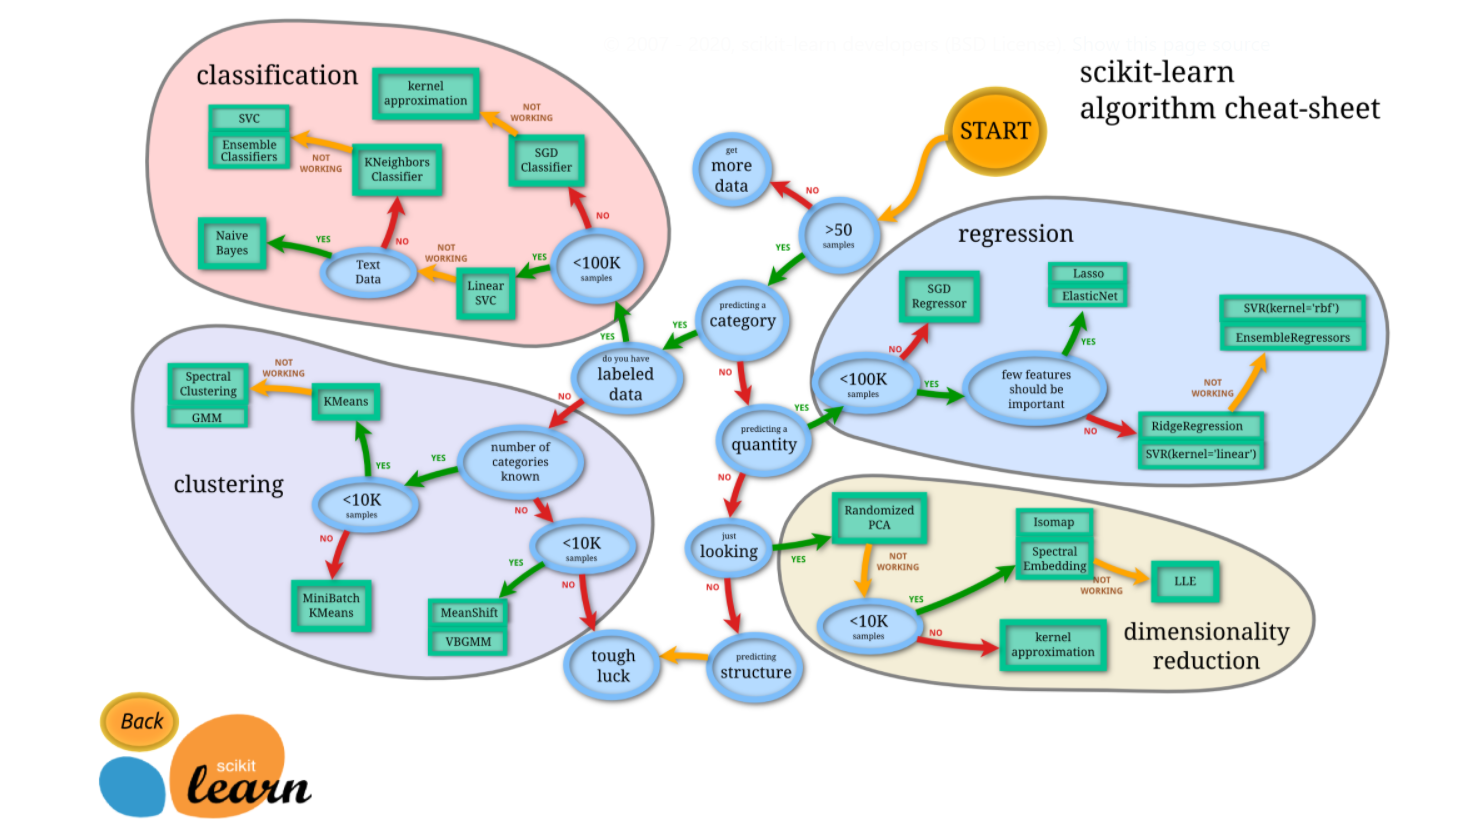

Let's look closer at the guidance of the scikit-learn official cheat sheet to see which models are useful to handle classification problem. 
In the first step in the chart above, we need to answer if we have enough data. The fashion-MNIST dataset contains 60.000 entries which are enough to predict a category. The label feature in the dataset shows that data is labeled. We are going to apply 4 different ML algorithms;


*   SVM
*   KNN
*   Random Forest
*   Decision Tree

Furthermore, we will play with different parameters(tuning) to figure out the best score and understanding how these parameters have an effect of it.










## Normalize Our Data

The values in our dataset ranges between 0 to 255. ML algorithms often works better with the values between 0 and 1, therefore, we can normalize our dataset by dividing it into 255. Data is int64 so that we have to convert it to float.

In [6]:
# Normalize the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

## PCA Dimension Reduction

PCA is a dimension reduction technique that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set. The idea is to lose a little accuracy for simplicity. It is also useful to analyze large datasets and therefore, It will be more fast to compute for the machine learning algorithms.

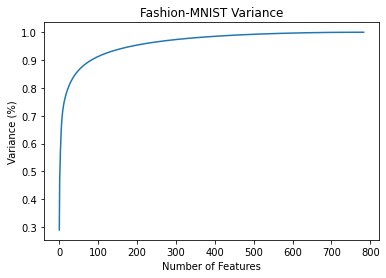

In [7]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Features')
plt.ylabel('Variance (%)')
plt.title('Fashion-MNIST Variance')
plt.show()

By using ~350 features, we can still hold %95 information of the data.

In [8]:
pca = PCA(n_components=350)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=350, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

We will use pca.transform method in order to transform the data

In [9]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

Let's check the shape of our dataset after performing pca

In [16]:
print("Train shape:{}".format(X_train_pca.shape))
print("Test shape:{}".format(X_test_pca.shape))

Train shape:(60000, 350)
Test shape:(10000, 350)


Let's create a method for displaying confusion matrix for evaluating our models.

In [10]:
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=90)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Training Our Model

### SVC

Optimizing SVM is finding best values for parameters such as gamma and the regularization parameter C. There are also kernel functions to systematically find supporty vector classifiers in higher dimenensions. In this example we will use RBF(Radial Basis Kernel) and Poly(Polynomial Kernel).



*   C: is the control of misclassifications(errors) on the training data.
Small C makes the cost of misclassificaiton low ("soft margin")
,Large C makes the cost of misclassification high ('hard margin")      

The approach should be a balance between  "not too strict" and "not too loose".



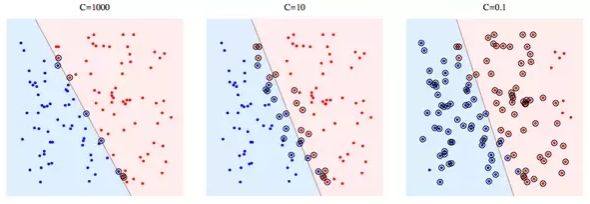

*   Gamma: is used when we use the Gaussian RBF kernel. Gamma decides that how much curvature we want in a decision boundary.




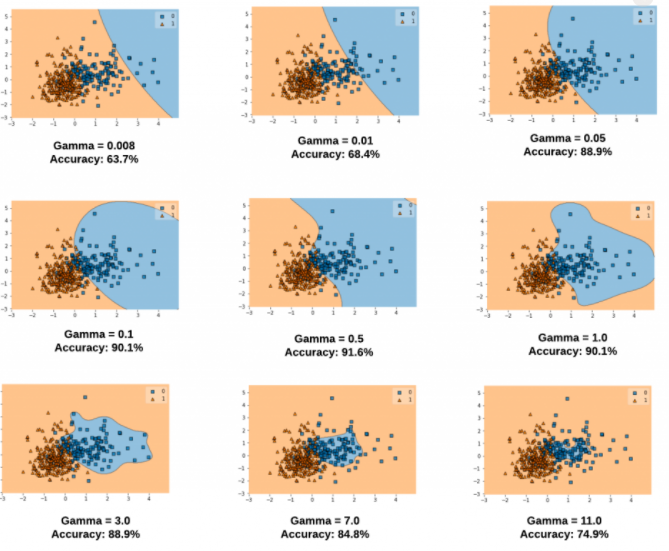

Since Gamma is used only in RBF kernel and it could take much longer time, for the sake of the practice challenge, we won't be using it as a hyperparamater.

SVM Report (C:0.01, kernel:rbf)
Time: 23.25 minute
F1 score: 0.7913084153625116
Accuracy score: 0.794
--------------------------------------------------
SVM Report (C:0.01, kernel:poly)
Time: 28.95 minute
F1 score: 0.7385798236545191
Accuracy score: 0.7219
--------------------------------------------------
SVM Report (C:1, kernel:rbf)
Time: 6.54 minute
F1 score: 0.8975839397595431
Accuracy score: 0.8981
--------------------------------------------------
SVM Report (C:1, kernel:poly)
Time: 7.91 minute
F1 score: 0.892660441053288
Accuracy score: 0.8921
--------------------------------------------------
SVM Report (C:10, kernel:rbf)
Time: 6.27 minute
F1 score: 0.9094693480808528
Accuracy score: 0.9098
--------------------------------------------------
SVM Report (C:10, kernel:poly)
Time: 6.63 minute
F1 score: 0.9049500278694704
Accuracy score: 0.905
--------------------------------------------------
SVM Report (C:50, kernel:rbf)
Time: 6.45 minute
F1 score: 0.9084983575644523
Accuracy scor

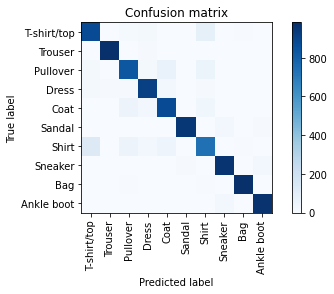

In [16]:
from sklearn.svm import SVC

SVC_c= [0.01,1, 10,50,100]
SVC_kernel =["rbf","poly"]

highest_f1 = 0
highest_model = ''
svc_cm_print = None
svc_total_time = None

for each_c in SVC_c:
  for each_kernel in SVC_kernel:
    
    SVC_start_time = time.time()

    svc = SVC(C=each_c, kernel=each_kernel)
    svc.fit(X_train_pca, y_train)

    SVC_end_time = time.time()
    svc_time = SVC_end_time-SVC_start_time

    y_pred_svc = svc.predict(X_test_pca)
    svc_f1 = metrics.f1_score(y_test, y_pred_svc, average= "weighted")
    svc_accuracy = metrics.accuracy_score(y_test, y_pred_svc)
    print("\033[1mSVM Report\033[0m"+" (C:\033[1m{}\033[0m, kernel:\033[1m{}\033[0m)".format(each_c,each_kernel))
    print("Time: \033[1m{:0.2f}\033[0m minute".format(svc_time/60.0))
    print("F1 score: \033[1m{}".format(svc_f1))
    print("\033[0mAccuracy score: \033[1m{}".format(svc_accuracy))
    print('-'*50)

    if svc_f1> highest_f1:
        highest_f1 = svc_f1
        highest_model = '(C:{}, kernel:{})'.format(each_c,each_kernel)
        svc_total_time = svc_time/60.0
        svc_cm_print = metrics.confusion_matrix(y_test, y_pred_svc)

print('\033[1m{}\033[0m Highest weighted average of F1:\033[1m{}'.format(highest_model,highest_f1))
print("Time: \033[1m{:0.2f}\033[0m minute".format(svc_total_time))
print("Confusion matrix: \n", svc_cm_print)
print('Plotting confusion matrix')
plt.figure()
plot_confusion_matrix(svc_cm_print, Labels)
plt.show()

## KNN

KNN is a  machine learning algorithm. The working principle of the KNN algorithm is to cluster objects according to the proximity relations between each other. They work on the coordinate plane with the linear separation method. KNN algorithm consists of five steps.

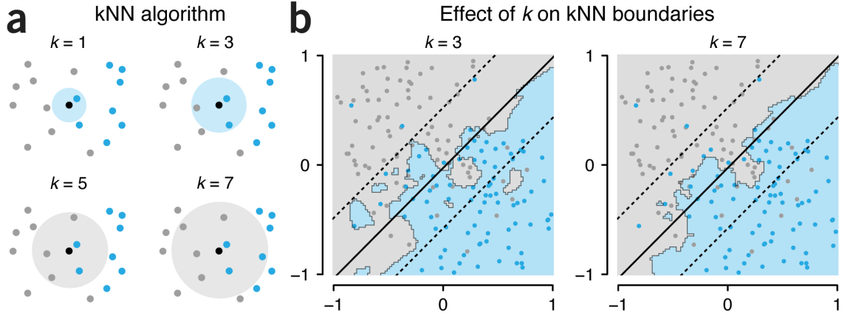



1. First of all, the K(n_neighbors) value is determined.
2. Distances from other objects to the target object are calculated.
3. The distances are listed and the closest neighbors are found depending on the minimum distance.
4. The closest neighbor categories are collected.
5. The most suitable neighbor category is selected.
 
In this case, K will be 1 and 9 which means the numbers of closest neighbors. Furthermore, we will check the difference between manhattan_distance for p=1 and euclidean_distance for p = 2 how they affect accuracy.

KNN Report (n_neighbors:1, p:1)
Time: 0.07 minute
F1 score: 0.8581897957049616
Accuracy score: 0.8579
--------------------------------------------------
KNN Report (n_neighbors:5, p:1)
Time: 0.06 minute
F1 score: 0.8584342857605527
Accuracy score: 0.8587
--------------------------------------------------
KNN Report (n_neighbors:9, p:1)
Time: 0.07 minute
F1 score: 0.854554764963698
Accuracy score: 0.8543
--------------------------------------------------
KNN Report (n_neighbors:1, p:2)
Time: 0.08 minute
F1 score: 0.8607757797636512
Accuracy score: 0.8608
--------------------------------------------------
KNN Report (n_neighbors:5, p:2)
Time: 0.08 minute
F1 score: 0.8622240774263413
Accuracy score: 0.8631
--------------------------------------------------
KNN Report (n_neighbors:9, p:2)
Time: 0.07 minute
F1 score: 0.8588415856356443
Accuracy score: 0.8596
--------------------------------------------------
(n_neighbors:5, p:2) Highest weighted average of F1:0.8622240774263413
Time: 0.08 m

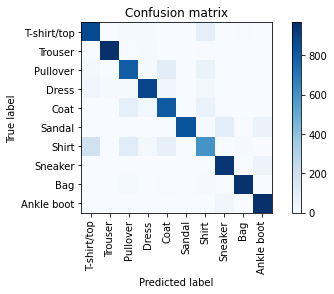

In [18]:
from sklearn.neighbors import KNeighborsClassifier

KNN_p= [1,2]
KNN_n_neighbors=[1,5,9]
highest_f1 = 0
highest_model = ''
KNN_cm_print = None
KNN_total_time = None

for each_p in KNN_p:
  for each_n_neighbors in KNN_n_neighbors:
    
    KNN_start_time = time.time()

    knn = KNeighborsClassifier(n_neighbors=each_n_neighbors,p=each_p)
    knn.fit(X_train_pca, y_train)

    KNN_end_time = time.time()
    knn_time = KNN_end_time-KNN_start_time

    y_pred_knn = knn.predict(X_test_pca)
    knn_f1 = metrics.f1_score(y_test, y_pred_knn, average= "weighted")
    knn_accuracy = metrics.accuracy_score(y_test, y_pred_knn)
    print("\033[1mKNN Report\033[0m"+" (n_neighbors:\033[1m{}\033[0m, p:\033[1m{}\033[0m)".format(each_n_neighbors,each_p))
    print("Time: \033[1m{:0.2f}\033[0m minute".format(knn_time/60.0))
    print("F1 score: \033[1m{}".format(knn_f1))
    print("\033[0mAccuracy score: \033[1m{}".format(knn_accuracy))
    print('-'*50)

    if knn_f1> highest_f1:
        highest_f1 = knn_f1
        highest_model = '(n_neighbors:{}, p:{})'.format(each_n_neighbors,each_p)
        KNN_total_time = knn_time/60.0
        KNN_cm_print = metrics.confusion_matrix(y_test, y_pred_knn)
        
print('\033[1m{}\033[0m Highest weighted average of F1:\033[1m{}'.format(highest_model,highest_f1))
print("Time: \033[1m{:0.2f}\033[0m minute".format(KNN_total_time))
print("Confusion matrix: \n", KNN_cm_print)
print('Plotting confusion matrix')
plt.figure()
plot_confusion_matrix(KNN_cm_print, Labels)
plt.show()

We found out that there is an error for the computation time for KNN. However, we couldnt figure it out why. It is actually took longer than the time written on the report.

## Random Forest

The random forest creates multiple decision trees and combines them to get a more accurate and stable prediction. The variety is what makes random forests more effective than individual decision trees.

A big advantage of the random forest is that it can be used for both classification and regression problems that make up most of the current machine learning systems. Since classification is sometimes considered the building block of machine learning, we'll also apply the algorithm.

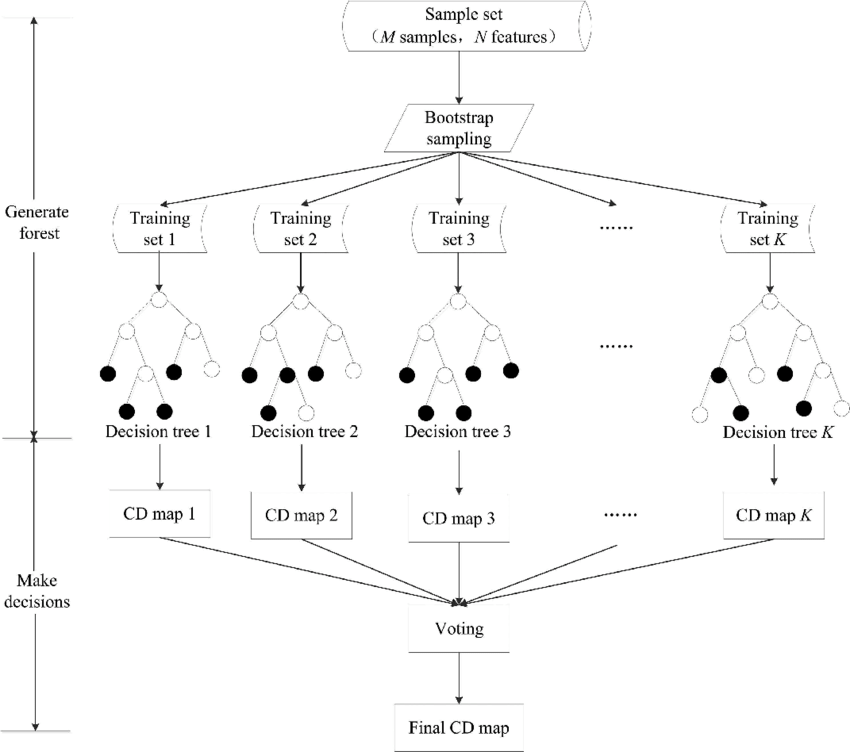

The Random Forest algorithm consists of two stages, one is the creation of a Random Forest, the other is to make predictions through the Random Forest classifier created in the first step. 



* n_estimators: number of trees in the forest. We will assign 10,50 also 100 to observe effects on accuracy.
* max_depth: max number of levels in each decision tree. we will assign 10,50 also 100 and observe effects on accuracy. 
* criterion: According to scikit, the function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. We will try both respectively and observe possible effects on accuracy.



Random Forest Report (criterion:entropy, max_depth:10, n_estimators:10)
Time: 0.73 minute
F1 score: 0.7859018133751828
Accuracy score: 0.7902
--------------------------------------------------
Random Forest Report (criterion:entropy, max_depth:10, n_estimators:50)
Time: 3.60 minute
F1 score: 0.8175503350842376
Accuracy score: 0.8229
--------------------------------------------------
Random Forest Report (criterion:entropy, max_depth:10, n_estimators:100)
Time: 7.31 minute
F1 score: 0.8199323509192964
Accuracy score: 0.825
--------------------------------------------------
Random Forest Report (criterion:entropy, max_depth:50, n_estimators:10)
Time: 0.93 minute
F1 score: 0.8100715751595888
Accuracy score: 0.8132
--------------------------------------------------
Random Forest Report (criterion:entropy, max_depth:50, n_estimators:50)
Time: 4.84 minute
F1 score: 0.8527720492023995
Accuracy score: 0.8556
--------------------------------------------------
Random Forest Report (criterion:ent

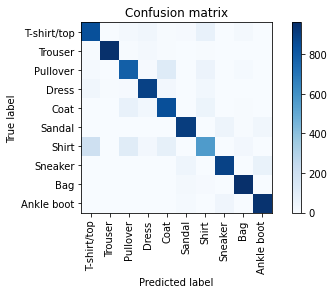

In [17]:
from sklearn.ensemble import RandomForestClassifier

RF_criterion= ["entropy", "gini"]
RF_max_depth =[10,50,100]
RF_n_estimators=[10,50,100]
highest_f1 = 0
highest_model = ''
random_forest_cm_print = None

for each_criterion in RF_criterion:
  for each_max_depth in RF_max_depth:
    for each_n_estimators in RF_n_estimators:
      RF_start_time = time.time()

      random_forest = RandomForestClassifier(criterion=each_criterion, max_depth=each_max_depth , n_estimators=each_n_estimators)
      random_forest.fit(X_train_pca, y_train)

      RF_end_time = time.time()
      forest_time = RF_end_time-RF_start_time

      y_pred_forest = random_forest.predict(X_test_pca)
      random_forest_f1 = metrics.f1_score(y_test, y_pred_forest, average= "weighted")
      random_forest_accuracy = metrics.accuracy_score(y_test, y_pred_forest)
      
      print("\033[1mRandom Forest Report\033[0m"+" (criterion:\033[1m{}\033[0m, max_depth:\033[1m{}\033[0m, n_estimators:\033[1m{}\033[0m)".format(each_criterion,each_max_depth,each_n_estimators))
      print("Time: \033[1m{:0.2f}\033[0m minute".format(forest_time/60.0))
      print("F1 score: \033[1m{}".format(random_forest_f1))
      print("\033[0mAccuracy score: \033[1m{}".format(random_forest_accuracy))
      print('-'*50)

      if random_forest_f1> highest_f1:
        highest_f1 = random_forest_f1
        highest_model = '(criterion:{}, max_depth:{}, n_estimators:{})'.format(each_criterion,each_max_depth,each_n_estimators)
        random_forest_cm_print = metrics.confusion_matrix(y_test, y_pred_forest)
        
print('\033[1m{}\033[0m Highest weighted average of F1:\033[1m{}'.format(highest_model,highest_f1))
print("Confusion matrix: \n", random_forest_cm_print)
print('Plotting confusion matrix')
plt.figure()
plot_confusion_matrix(random_forest_cm_print, Labels)
plt.show()

## Decision Tree


Decision trees are simple to implement and equally easy to understand. It is a supervised machine learning technique that is used both for classification and regression.


*   Criterion: According to scikit, it is "The function to measure the quality of a split". Computationally, entropy is more complex since it makes use of logarithms and overall, the calculation of the Gini Index will be faster.
Researches point out that in most of the cases, the choice of splitting criteria will not make much difference in the tree performance. Therefore, we can use gini because it can perform faster.

*   Max Depth: According to scikit, max depth is "The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples". If we have increase max depth, our tree will be more complicated because we will have more splits. It also can cause overfitting of the data and will not be able to generalize well on test set. Underfitting can also cause problems. Therefore, we need to test different scenario to find out best results.

*   Splitter:The strategy used to choose the split at each node. There are 2 different splitters namely, "random" and "best". "Best"
 splitter will calculate the best features to split based on the impurity measure and use that to split the nodes. On the other hand in "Random"we can have a high chance of ending up with features that don’t really give much information therefore, accuracy might be less. Furthermore, "Random" can helps us to prevent overfitting because it selects a set of features randomly and splits. Moreover, it is also need less computation.




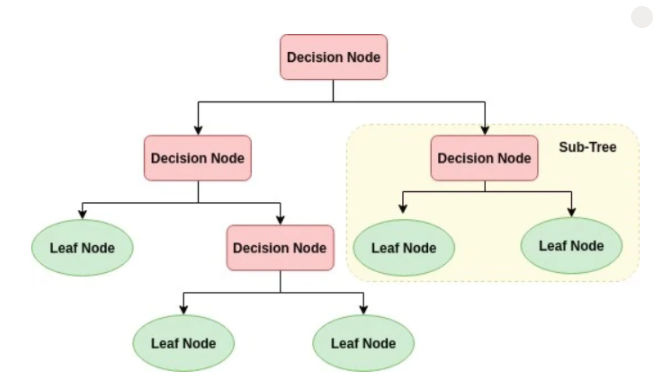

Decision Tree Report(criterion:entropy, max_depth:10, splitter:random)
Time: 0.07 minute
F1 score: 0.7474020740849348
Accuracy score: 0.7505
--------------------------------------------------
Decision Tree Report(criterion:entropy, max_depth:10, splitter:best)
Time: 1.88 minute
F1 score: 0.7808739718083267
Accuracy score: 0.7822
--------------------------------------------------
Decision Tree Report(criterion:entropy, max_depth:50, splitter:random)
Time: 0.09 minute
F1 score: 0.7465979655743399
Accuracy score: 0.7463
--------------------------------------------------
Decision Tree Report(criterion:entropy, max_depth:50, splitter:best)
Time: 2.22 minute
F1 score: 0.7714834189272429
Accuracy score: 0.771
--------------------------------------------------
Decision Tree Report(criterion:entropy, max_depth:100, splitter:random)
Time: 0.09 minute
F1 score: 0.7485224943612084
Accuracy score: 0.7492
--------------------------------------------------
Decision Tree Report(criterion:entropy, max_

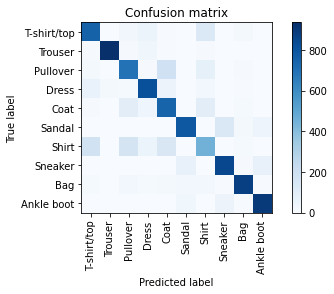

In [32]:
from sklearn.tree import DecisionTreeClassifier

DT_criterion= ["entropy", "gini"]
DT_max_depth =[10,50,100]
DT_splitter=["random","best"]
highest_f1 = 0
highest_model = ''
tree_cm_print = None

for each_criterion in DT_criterion:
  for each_max_depth in DT_max_depth:
    for each_splitter in DT_splitter:
      DT_start_time = time.time()

      tree = DecisionTreeClassifier(max_depth=each_max_depth, criterion=each_criterion,splitter=each_splitter)
      tree.fit(X_train_pca, y_train)

      DT_end_time = time.time()
      tree_time = DT_end_time-DT_start_time

      y_pred_tree = tree.predict(X_test_pca)
      tree_f1 = metrics.f1_score(y_test, y_pred_tree, average= "weighted")
      tree_accuracy = metrics.accuracy_score(y_test, y_pred_tree)
      print("\033[1mDecision Tree Report\033[0m(criterion:\033[1m{}\033[0m, max_depth:\033[1m{}\033[0m, splitter:\033[1m{}\033[0m)".format(each_criterion,each_max_depth,each_splitter))
      print("Time:\033[1m {:0.2f}\033[0m minute".format(tree_time/60.0))
      print("F1 score:\033[1m {}\033[0m".format(tree_f1))
      print("Accuracy score: \033[1m{}\033[0m".format(tree_accuracy))
      print('-'*50)

      if tree_f1>highest_f1:
        highest_f1 = tree_accuracy
        highest_model = "(criterion:\033[1m{}\033[0m, max_depth:\033[1m{}\033[0m, splitter:\033[1m{}\033[0m)".format(each_criterion,each_max_depth,each_splitter)
        tree_cm_print = metrics.confusion_matrix(y_test, y_pred_tree)
        
        
print('\033[1m{}\033[0m Highest weighted average of F1: {}'.format(highest_model,highest_f1))
print("Confusion matrix: \n", tree_cm_print)
print('Plotting confusion matrix')
plt.figure()
plot_confusion_matrix(tree_cm_print, Labels)
plt.show()

# Conclusion

We applied 4 different ML prediction models to the dataset. We also did some tuning by trying different hyperparameters to compare to observe the changes on the result. Furthermore, we had 4 different best results from each ML model. the classification report from scikit is used to measure the quality of predictions from a classification algorithm. This report shows the classification metrics such as precision, recall and f1-score.




*   SVM: (C:10, kernel:rbf) Highest weighted average of F1:0.90, Accuracy score: 0.90
*   KNN: (n_neighbors:5, p:2) Highest weighted average of F1:0.86, Accuracy score: 0.86
*   Random Forest: (criterion:gini, max_depth:100, n_estimators:100) Highest weighted average of F1:0.85, Accuracy score: 0.86
*   Decision Tree: (criterion:entropy, max_depth:10, splitter:best) Highest weighted average of F1: 0.78, Accuracy score: 0.78

We used the F1 score for compare classifier models. It is a weighted harmonic mean of precision and recall. In this case we could use accuracy as well because our datasets is balanced. However, in a unbalanced datasets, classification accuracy fails on classification problems with a skewed class distribution.

In conclusion, We choose SVM for ML model. Although, the time of the computation is quite longer than other models, It is clear that, it gave us the highest score.




We can also observe the confusion matrix, precision, recall, f1 score, accuracy and support of the svm. It can be seen from the support that our data is well balanced between classes(labels). Overall, the performance of our model met with our expactations.

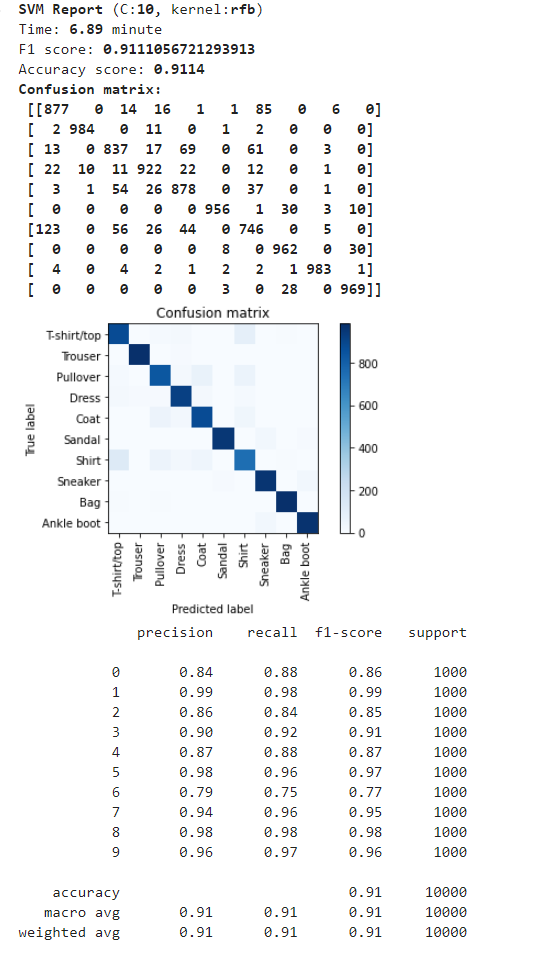